<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/08-Arboles-Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Emilio Andrade &bull; 2026-17-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

En este taller se trabaja con Árboles de Decisión para un problema de clasificación, la idea es tomar una base con variables de comportamiento y transacciones y a partir de eso entrenar un modelo que pueda separar clases de interés

El foco no es solo entrenar por entrenar, también es revisar los datos, entender qué columnas sirven y luego evaluar en un conjunto de prueba con métricas claras como la matriz de confusión y el reporte de clasificación


Los paquetes necesarios son:

In [22]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [13]:
path = "https://raw.githubusercontent.com/1EmilioAnd1/CD-Andrade-Emilio/refs/heads/main/synthetic_ecommerce_churn_dataset.csv"
data = pd.read_csv(path)

data["customer_since"] = pd.to_datetime(data["customer_since"], errors="coerce")
ref_date = data["customer_since"].max()
data["tenure_days"] = (ref_date - data["customer_since"]).dt.days

display(data.head())
display(data.describe(include="all"))
display(data.isna().sum())
display(data["is_fraudulent"].value_counts())

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,tenure_days
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20,388
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34,495
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05,438
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19,1816
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15,80


,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,tenure_days
count,5000,5000.000000,5000,5000,4750.000000,5000.000000,5000.000000,5000.000000,5000,4750.000000,5000,5000.000000,5000.000000,5000.000000
unique,3809,NaN,3,10,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
top,CUST_5780,NaN,Male,Australia,NaN,NaN,NaN,NaN,Beauty,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,2278,518,NaN,NaN,NaN,NaN,1035,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.163200,NaN,NaN,108.442857,10.027000,180.073200,0.025800,NaN,50.714842,2023-01-02 10:01:03.360000,50.039400,0.284484,907.582600
min,NaN,18.000000,NaN,NaN,10.660000,0.000000,0.000000,0.000000,NaN,0.000000,2020-06-29 00:00:00,1.000000,0.000000,0.000000
25%,NaN,33.000000,NaN,NaN,57.805000,8.000000,89.000000,0.000000,NaN,25.225000,2021-09-20 00:00:00,25.000000,0.160000,443.000000
50%,NaN,48.000000,NaN,NaN,93.190000,10.000000,178.000000,0.000000,NaN,50.950000,2023-01-11 00:00:00,50.000000,0.260000,899.000000
75%,NaN,64.000000,NaN,NaN,142.197500,12.000000,270.000000,0.000000,NaN,76.800000,2024-04-11 00:00:00,75.000000,0.390000,1377.000000
max,NaN,79.000000,NaN,NaN,555.460000,23.000000,364.000000,1.000000,NaN,100.000000,2025-06-28 00:00:00,99.000000,0.900000,1825.000000


,0
customer_id,0
age,0
gender,0
country,0
avg_order_value,250
total_orders,0
last_purchase,0
is_fraudulent,0
preferred_category,0
email_open_rate,250


,count
is_fraudulent,
0,4871
1,129


In [14]:
y = data["is_fraudulent"]
X = data.drop(columns=["customer_id", "customer_since", "is_fraudulent"])

cat_cols = ["gender", "country", "preferred_category"]
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ]
)

X_pre = preprocess.fit_transform(X)
X_pre.shape

(5000, 26)

Con los resultados anteriores se ve que hay valores faltantes en avg_order_value y email_open_rate, por eso primero se imputan para no romper el entrenamiento

También hay columnas categóricas como gender, country y preferred_category, entonces se codifican con one hot para poder trabajarlas como variables numéricas dentro del modelo

Sobre escalar, en Árboles de Decisión no es necesario porque el modelo no usa distancias ni productos internos como en otros algoritmos, el árbol solo compara umbrales y hace splits, por eso aquí no se aplica escalado y se mantiene el enfoque en imputación y codificación



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

En esta parte dividimos la base en entrenamiento y prueba, así la evaluación se hace en datos que el modelo no vio antes, esto ayuda a ver si de verdad generaliza y no solo memoriza

Luego se entrena el Árbol de Decisión y se evalúa con el conjunto de prueba, se usa matriz de confusión y también métricas como accuracy y el reporte de clasificación, para ver con más detalle dónde acierta y dónde falla


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

modelo = Pipeline(steps=[
    ("prep", preprocess),
    ("tree", DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42))
])

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Precisión del modelo:", round(accuracy_score(y_test, y_pred), 4))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.973
[[973   1]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



El modelo se entrenó y se evaluó con el conjunto de prueba, la precisión total sale alta 0.973 y a primera vista parece que funciona bien

Pero al revisar la matriz de confusión se nota el problema, el modelo casi siempre predice la clase 0, y para la clase 1 no logra detectar casos, de 26 fraudes en test no acierta ninguno, por eso en el reporte la precisión y el recall de la clase 1 quedan en 0

Esto pasa porque la base está muy desbalanceada, hay muchos más ceros que unos, entonces el árbol puede conseguir buena accuracy simplemente aprendiendo a decir casi siempre 0, por eso en este caso la accuracy sola no alcanza y toca mirar también recall y f1 de la clase 1


Primero reviso el desbalance de clases, porque en esta base hay muy pocos casos de fraude y eso hace que una accuracy alta no signifique que el modelo sea bueno

Luego muestro la matriz de confusión en gráfico, así se entiende rápido cuántos casos se detectan bien y cuántos se pierden, especialmente en la clase 1 que es la importante aquí


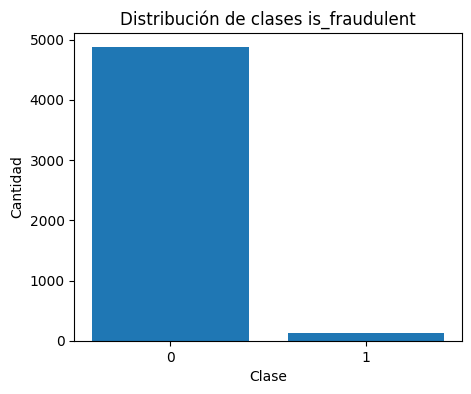

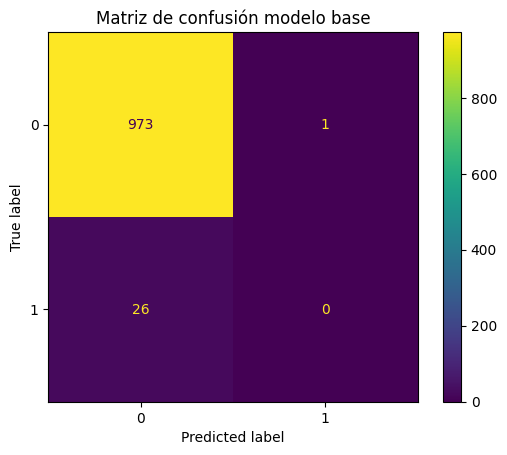

In [16]:
vals = data["is_fraudulent"].value_counts()
plt.figure(figsize=(5, 4))
plt.bar(vals.index.astype(str), vals.values)
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.title("Distribución de clases is_fraudulent")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format="d")
plt.title("Matriz de confusión modelo base")
plt.show()

En la distribución se nota un desbalance fuerte, hay muchos casos de la clase 0 y muy pocos de la clase 1, por eso el modelo puede verse bien si uno solo mira la accuracy

La matriz de confusión confirma eso, el árbol casi siempre predice 0, y los 26 casos reales de fraude en test quedan como falsos negativos, entonces el modelo no está aprendiendo bien la clase 1, aquí lo importante es mejorar recall y f1 de la clase 1 y no solo subir accuracy


Precisión del modelo: 0.424
[[408 566]
 [ 10  16]]
              precision    recall  f1-score   support

           0       0.98      0.42      0.59       974
           1       0.03      0.62      0.05        26

    accuracy                           0.42      1000
   macro avg       0.50      0.52      0.32      1000
weighted avg       0.95      0.42      0.57      1000



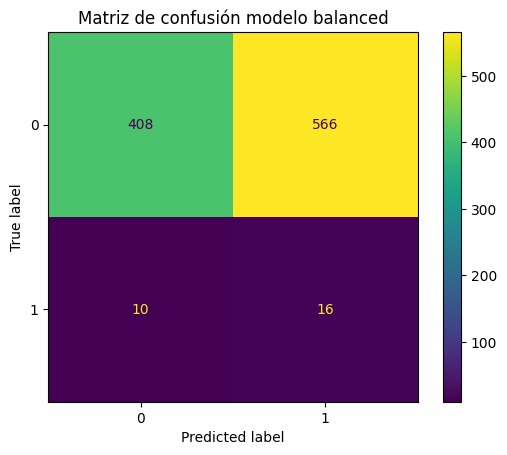

In [17]:
modelo_bal = Pipeline(steps=[
    ("prep", preprocess),
    ("tree", DecisionTreeClassifier(criterion="entropy", max_depth=4, class_weight="balanced", random_state=42))
])

modelo_bal.fit(X_train, y_train)

y_pred_bal = modelo_bal.predict(X_test)

print("Precisión del modelo:", round(accuracy_score(y_test, y_pred_bal), 4))
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bal, values_format="d")
plt.title("Matriz de confusión modelo balanced")
plt.show()

Al usar class_weight balanced el árbol deja de ignorar la clase minoritaria, y ya logra detectar fraudes, en test acierta 16 de 26 y el recall de la clase 1 sube a 0.62, esto es una mejora clara respecto al modelo base que no detectaba ninguno

Sin embargo el costo es alto, el modelo genera muchos falsos positivos, por eso la precisión de la clase 1 cae a 0.03 y la accuracy baja bastante, esto se entiende porque al balancear se penaliza más equivocarse en la clase 1, entonces el árbol empieza a predecir 1 con mucha más frecuencia

Average precision: 0.0299
Mejor umbral (por f1): 0.4993
Precision en mejor punto: 0.0287
Recall en mejor punto: 0.8462
F1 en mejor punto: 0.0556


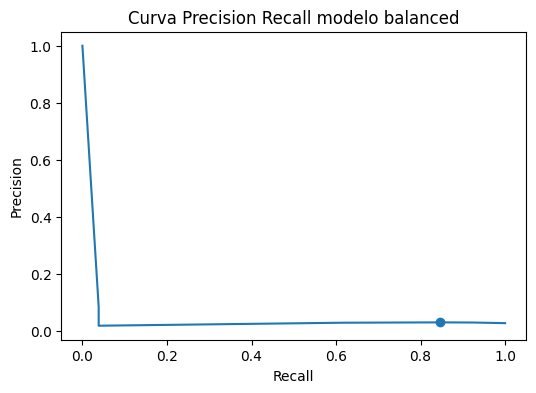

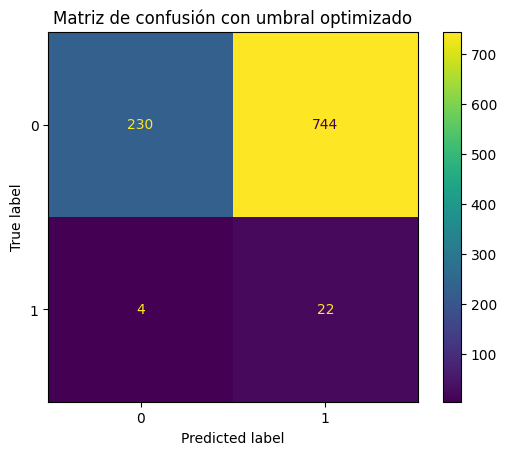

[[230 744]
 [  4  22]]
              precision    recall  f1-score   support

           0       0.98      0.24      0.38       974
           1       0.03      0.85      0.06        26

    accuracy                           0.25      1000
   macro avg       0.51      0.54      0.22      1000
weighted avg       0.96      0.25      0.37      1000



In [20]:
proba_bal = modelo_bal.predict_proba(X_test)[:, 1]

ap = average_precision_score(y_test, proba_bal)
prec, rec, thr = precision_recall_curve(y_test, proba_bal)

f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_i = np.argmax(f1[:-1])
best_thr = thr[best_i]

print("Average precision:", round(ap, 4))
print("Mejor umbral (por f1):", round(float(best_thr), 4))
print("Precision en mejor punto:", round(float(prec[best_i]), 4))
print("Recall en mejor punto:", round(float(rec[best_i]), 4))
print("F1 en mejor punto:", round(float(f1[best_i]), 4))

plt.figure(figsize=(6, 4))
plt.plot(rec, prec)
plt.scatter(rec[best_i], prec[best_i])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision Recall modelo balanced")
plt.show()

y_pred_thr = (proba_bal >= best_thr).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thr, values_format="d")
plt.title("Matriz de confusión con umbral optimizado")
plt.show()

print(confusion_matrix(y_test, y_pred_thr))
print(classification_report(y_test, y_pred_thr))

La curva precision recall se mantiene muy baja, y el average precision es 0.0299, esto indica que el modelo no separa bien las clases y que en general su capacidad predictiva para fraude es limitada en esta configuración

Al optimizar el umbral por f1 se logra aumentar el recall de la clase 1 hasta 0.85, es decir se detectan 22 de 26 fraudes, esto es útil si la prioridad es no dejar pasar fraudes

El costo es que la precisión se mantiene muy baja, porque aparecen muchos falsos positivos, en la matriz se ve que el modelo marca como fraude a muchos casos que no lo son, entonces baja la accuracy y se vuelve un sistema que detecta mucho pero también alarma demasiado

In [23]:
configs = [
    {"max_depth": 3, "min_samples_leaf": 20, "min_samples_split": 40},
    {"max_depth": 4, "min_samples_leaf": 50, "min_samples_split": 100},
    {"max_depth": 5, "min_samples_leaf": 100, "min_samples_split": 200},
]

for cfg in configs:
    modelo_reg = Pipeline(steps=[
        ("prep", preprocess),
        ("tree", DecisionTreeClassifier(
            criterion="entropy",
            class_weight="balanced",
            random_state=42,
            **cfg
        ))
    ])

    modelo_reg.fit(X_train, y_train)
    pred = modelo_reg.predict(X_test)

    p1 = precision_score(y_test, pred, zero_division=0)
    r1 = recall_score(y_test, pred, zero_division=0)
    f1_ = f1_score(y_test, pred, zero_division=0)

    print(cfg, "precision1=", round(p1,4), "recall1=", round(r1,4), "f1_1=", round(f1_,4))

{'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 40} precision1= 0.0299 recall1= 0.6154 f1_1= 0.057
{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100} precision1= 0.0275 recall1= 0.6154 f1_1= 0.0526
{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 200} precision1= 0.0264 recall1= 0.6154 f1_1= 0.0506


Se probaron variaciones del Árbol de Decisión con regularización, usando min_samples_leaf y min_samples_split para evitar reglas muy específicas y reducir falsos positivos

En los tres casos el recall de la clase 1 se mantuvo en 0.6154, y la precisión siguió muy baja cerca de 0.03, por lo tanto la regularización por sí sola no resolvió el problema principal, que es la baja separabilidad entre clases en este dataset para la variable is_fraudulent

En otras palabras, se puede ajustar el árbol para que sea más estable, pero si la señal en las variables no es suficiente, el modelo seguirá marcando muchos falsos positivos o seguirá perdiendo casos reales, esto también coincide con el average precision bajo observado antes

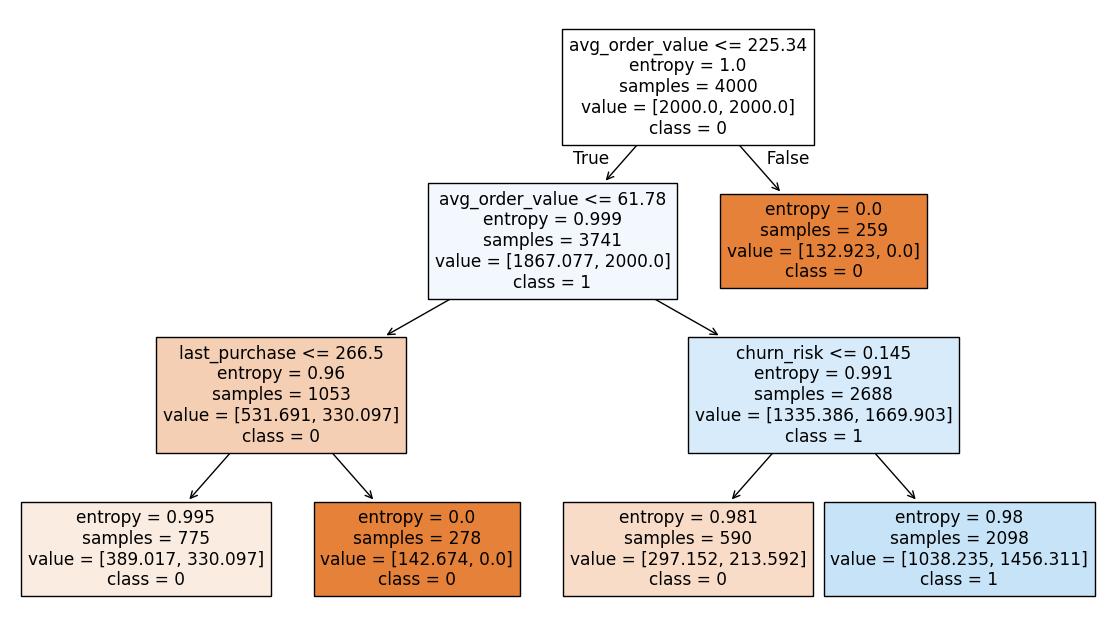

,0
avg_order_value,0.571479
last_purchase,0.329120
churn_risk,0.099400
age,0.000000
email_open_rate,0.000000
total_orders,0.000000
loyalty_score,0.000000
tenure_days,0.000000
gender_Female,0.000000
gender_Male,0.000000


In [25]:
cfg_best = {"max_depth": 3, "min_samples_leaf": 20, "min_samples_split": 40}

modelo_best = Pipeline(steps=[
    ("prep", preprocess),
    ("tree", DecisionTreeClassifier(
        criterion="entropy",
        class_weight="balanced",
        random_state=42,
        **cfg_best
    ))
])

modelo_best.fit(X_train, y_train)

tree = modelo_best.named_steps["tree"]
ohe = modelo_best.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_names)

plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=feature_names, class_names=["0", "1"], filled=True)
plt.show()

imp = pd.Series(tree.feature_importances_, index=feature_names).sort_values(ascending=False)
display(imp.head(10))

Para entender el comportamiento del modelo se visualizó el árbol y se revisó la importancia de variables, esto ayuda a ver qué información está usando realmente para tomar decisiones

En este caso el árbol se apoya casi por completo en avg_order_value, last_purchase y churn_risk, mientras que el resto de variables tienen importancia cero, esto sugiere que con esta configuración el modelo no está encontrando señales útiles en las demás columnas, y por eso la capacidad de separar fraude y no fraude es limitada

También se observa que el árbol hace cortes simples por umbrales, por ejemplo en avg_order_value y last_purchase, esto es coherente con la lógica de los Árboles de Decisión, pero al mismo tiempo explica por qué aparecen muchos falsos positivos cuando se fuerza a detectar la clase minoritaria, la separación no es clara y el modelo termina marcando muchos casos como fraude


In [26]:
X2 = data.drop(columns=["customer_id", "customer_since", "is_fraudulent", "churn_risk"])

cat_cols2 = ["gender", "country", "preferred_category"]
num_cols2 = [c for c in X2.columns if c not in cat_cols2]

preprocess2 = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols2),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols2),
    ]
)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

cfg_best = {"max_depth": 3, "min_samples_leaf": 20, "min_samples_split": 40}

modelo_nochurn = Pipeline(steps=[
    ("prep", preprocess2),
    ("tree", DecisionTreeClassifier(
        criterion="entropy",
        class_weight="balanced",
        random_state=42,
        **cfg_best
    ))
])

modelo_nochurn.fit(X2_train, y2_train)

pred_nochurn = modelo_nochurn.predict(X2_test)

print(confusion_matrix(y2_test, pred_nochurn))
print(classification_report(y2_test, pred_nochurn))

[[335 639]
 [  9  17]]
              precision    recall  f1-score   support

           0       0.97      0.34      0.51       974
           1       0.03      0.65      0.05        26

    accuracy                           0.35      1000
   macro avg       0.50      0.50      0.28      1000
weighted avg       0.95      0.35      0.50      1000



Se entrenó un modelo adicional excluyendo churn_risk, porque esa variable está pensada para otro objetivo y podía sesgar la interpretación del árbol en un problema de fraude

Los resultados muestran una mejora ligera en la detección de fraudes, el recall de la clase 1 sube a 0.65 y se detectan 17 de 26 casos, sin embargo la precisión se mantiene muy baja cerca de 0.03 y siguen existiendo muchos falsos positivos

Esto sugiere que el problema no era solo churn_risk, sino que en general las variables disponibles no separan bien fraude y no fraude en este dataset, por eso aunque se ajuste el peso de clases y se regularice el árbol, el modelo tiende a generar muchas alarmas falsas si se prioriza no perder fraudes


In [27]:
resumen = []

resumen.append({
    "modelo": "Base",
    "accuracy": accuracy_score(y_test, y_pred),
    "precision_1": precision_score(y_test, y_pred, zero_division=0),
    "recall_1": recall_score(y_test, y_pred, zero_division=0),
    "f1_1": f1_score(y_test, y_pred, zero_division=0)
})

resumen.append({
    "modelo": "Balanced",
    "accuracy": accuracy_score(y_test, y_pred_bal),
    "precision_1": precision_score(y_test, y_pred_bal, zero_division=0),
    "recall_1": recall_score(y_test, y_pred_bal, zero_division=0),
    "f1_1": f1_score(y_test, y_pred_bal, zero_division=0)
})

resumen.append({
    "modelo": "Balanced + umbral",
    "accuracy": accuracy_score(y_test, y_pred_thr),
    "precision_1": precision_score(y_test, y_pred_thr, zero_division=0),
    "recall_1": recall_score(y_test, y_pred_thr, zero_division=0),
    "f1_1": f1_score(y_test, y_pred_thr, zero_division=0)
})

resumen.append({
    "modelo": "Balanced regularizado",
    "accuracy": accuracy_score(y_test, modelo_best.predict(X_test)),
    "precision_1": precision_score(y_test, modelo_best.predict(X_test), zero_division=0),
    "recall_1": recall_score(y_test, modelo_best.predict(X_test), zero_division=0),
    "f1_1": f1_score(y_test, modelo_best.predict(X_test), zero_division=0)
})

resumen.append({
    "modelo": "Sin churn_risk",
    "accuracy": accuracy_score(y2_test, pred_nochurn),
    "precision_1": precision_score(y2_test, pred_nochurn, zero_division=0),
    "recall_1": recall_score(y2_test, pred_nochurn, zero_division=0),
    "f1_1": f1_score(y2_test, pred_nochurn, zero_division=0)
})

tabla = pd.DataFrame(resumen)
display(tabla)

,modelo,accuracy,precision_1,recall_1,f1_1
0,Base,0.973,0.000000,0.000000,0.000000
1,Balanced,0.424,0.027491,0.615385,0.052632
2,Balanced + umbral,0.252,0.028721,0.846154,0.055556
3,Balanced regularizado,0.471,0.029907,0.615385,0.057041
4,Sin churn_risk,0.352,0.025915,0.653846,0.049853


En este taller aprendí que en datos desbalanceados la accuracy puede engañar, el modelo base tuvo 0.973 pero no detectó ningún fraude, luego al usar class_weight balanced el recall de la clase 1 subió a 0.615 y con umbral llegó a 0.846, pero la precisión se quedó cerca de 0.03 por muchos falsos positivos, al regularizar y quitar churn_risk el comportamiento se mantuvo parecido y la mejora fue pequeña, así que la conclusión es que el árbol sirve para entender bien el flujo y el desbalance, pero con estas variables no logra un equilibrio fuerte entre detectar fraudes y evitar alarmas falsas.